# Ford GoBike System Data
## by Mohammed

## Preliminary Wrangling

Ford GoBike System Data contain informations about GoBike system which store the information for each bike used in trips like the distance and the start and end time of the trip also the name of stations destination.   <br>There are 94802 records in the dataset with 14 features ( duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name	end_station_latitude, end_station_longitude, bike_id, user_type and bike_share_for_all_trip).

In [325]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from datetime import datetime

%matplotlib inline

***Using Concat function in pandas The multiple CSV files combined in one as part of Wrangling the Dataset. [This Link](https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/) in freecodecamp was helpful***

In [326]:
# Get all file names into one variable 
os.chdir("/Users/m7md/Data Analysis/Project 5/Communicate Finding Project/Data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [327]:
# combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

/Library/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [328]:
# load the dataset into pandas dataframe
df = pd.read_csv('combined_csv.csv')

/Library/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,7,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [329]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,Unnamed: 0,time,distance
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917802,471,2018-03-01 00:28:29.1730,2018-03-01 00:36:20.9280,180,Telegraph Ave at 23rd St,37.812678,-122.268773,202,Washington St at 8th St,37.800754,-122.274894,269.0,Subscriber,Yes,NaN,NaN,NaN
5917803,285,2018-03-01 00:17:32.9500,2018-03-01 00:22:18.1560,183,Telegraph Ave at 19th St,37.808702,-122.269927,195,Bay Pl at Vernon St,37.812314,-122.260779,302.0,Subscriber,No,NaN,NaN,NaN
5917804,408,2018-03-01 00:13:37.1640,2018-03-01 00:20:25.6830,27,Beale St at Harrison St,37.788059,-122.391865,11,Davis St at Jackson St,37.797280,-122.398436,1060.0,Customer,No,NaN,NaN,NaN
5917805,368,2018-03-01 00:14:14.4590,2018-03-01 00:20:22.5140,27,Beale St at Harrison St,37.788059,-122.391865,11,Davis St at Jackson St,37.797280,-122.398436,3040.0,Customer,No,NaN,NaN,NaN


> ### That is a lot of data, there is about 3 milion and more records. So I'm just going to take one month of GoBike records instead.

In [330]:
df = pd.read_csv('201801-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  bike_share_for_all_trip  94802 non-null  object 
dtypes: float64(4), int64(4

In [332]:
#df.drop(['start_station_latitude' , 'start_station_longitude' , 'end_station_latitude' , 'end_station_longitude' , 'start_station_name' , 'end_station_name'] , axis=1 , inplace = True)

# I was going to drop these columns but i'll keep them maybe there is a way to use them.

In [333]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(94802, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


In [334]:
# start time and end time to date object 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [335]:
usersList = ['Subscriber' , 'Customer']

ordered_users = pd.api.types.CategoricalDtype(ordered = True, categories = usersList)
df['user_type'] = df['user_type'].astype(ordered_users)

In [336]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
bike_share_for_all_trip            object
dtype: object

In [337]:
print(df.start_time.dtypes)
print(df.end_time.dtypes)

datetime64[ns]
datetime64[ns]


In [338]:
df.bike_id.value_counts()

3497    100
3181     91
2364     91
3645     90
2170     89
       ... 
1662      1
3201      1
134       1
2278      1
2679      1
Name: bike_id, Length: 3065, dtype: int64

In [339]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000


### What is the structure of your dataset?

There are 94802 records in the dataset with 14 features ( duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name	end_station_latitude, end_station_longitude, bike_id, user_type and bike_share_for_all_trip). This dataset consist of different things of variables datatypes in nature. user_type variable is nominal variables it's explained below.


user_type: Subscriber or Customer 

if it's == “Subscriber” then it means is a Member <br> 
and if it's  == “Customer” then it means is a Casual


### What is/are the main feature(s) of interest in your dataset?

I'm intersted in finding the most taken trips based on duration , distance also compare between different factors with user types.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the duration , times variables , distances variables , also I think the User types variable will be in intersting feature to find with it a lot of information.

## Univariate Exploration

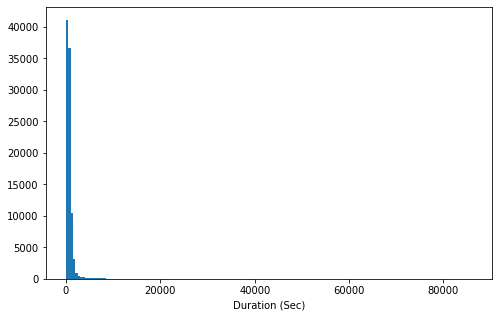

In [340]:
# Start with standard histogram for quantative data
binsize = 500
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(df['duration_sec'], bins = bins)
plt.xlabel('Duration (Sec)')
plt.show()

> the size of the pot is bigger than where the data are distrupited . . the data should be limited to about 9 or 10 thousand.

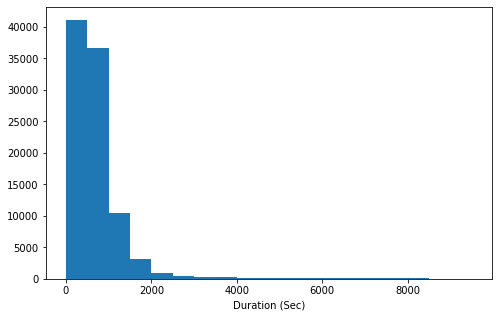

In [341]:
# Start with standard histogram for quantative data
binsize = 500
bin_max_value = 10000
bins = np.arange(0, bin_max_value, binsize)
plt.figure(figsize=[8, 5])
plt.hist(df.duration_sec , bins = bins)
plt.xlabel('Duration (Sec)')
plt.show()

> long tail in the distribution so I need to scale it to log scale

In [342]:
np.log10(df.duration_sec.describe())

count    4.976817
mean     2.939986
std      3.406642
min      1.785330
25%      2.555094
50%      2.744293
75%      2.931458
max      4.932200
Name: duration_sec, dtype: float64

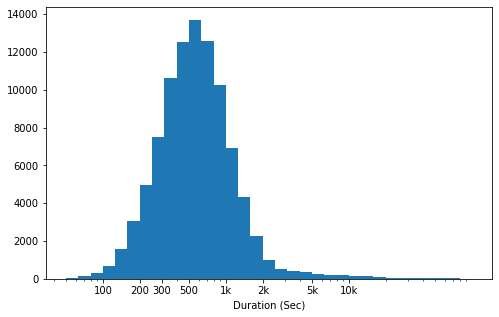

In [343]:
# Using log Scale
binsize = 0.1
bin_max_value = 5
bins = 10 ** np.arange(1.7, bin_max_value+binsize , binsize)
plt.figure(figsize=[8, 5])
plt.hist(df.duration_sec , bins = bins)
plt.xscale('log')
plt.xticks([100 , 200 , 300 , 500, 1e3 , 2e3 , 5e3 ,  1e4 ], [100 , 200 , 300 , 500, '1k' , '2k', '5k', '10k' ])
plt.xlabel('Duration (Sec)')
plt.show()

> As the graph shows the normal distribution for duration is betweet 300 and 1000. There is unusual duartion values when goes above the 10 or 12 thousand and it very low as the graph shows. 

In [344]:
df.user_type.value_counts()

Subscriber    82458
Customer      12344
Name: user_type, dtype: int64

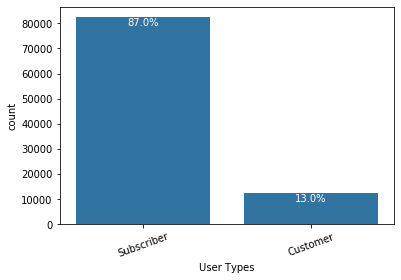

In [345]:
# Create Bar chart with provide important information
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.xticks(rotation = 20)
plt.xlabel('User Types')

# for addining notations
number_users = df.shape[0]
userTypes = df.user_type.value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = userTypes[label.get_text()]
    percentage_string = '{:0.1f}%'.format(100*count/number_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, percentage_string, ha = 'center', color = 'w' , va = 'top')


plt.show()

> That's really good for now I found the subseribers are higher number than the customers . The Subscribers represents 87 percent of the users in the GoBike ford system data. As it looks from the graph the subscribers are 8 times of the customers that's huge number. <br> <br>
> hurray I'm really happy that precentages presented on the bars I tried many ways until it works ^_^

In [346]:
# Statistics for the distances
df.start_station_latitude.describe() , df.end_station_latitude.describe()

(count    94802.000000
 mean        37.773321
 std          0.085744
 min         37.317298
 25%         37.771662
 50%         37.781270
 75%         37.795392
 max         37.880222
 Name: start_station_latitude, dtype: float64,
 count    94802.000000
 mean        37.773536
 std          0.085552
 min         37.317298
 25%         37.773063
 50%         37.781752
 75%         37.795392
 max         37.880222
 Name: end_station_latitude, dtype: float64)

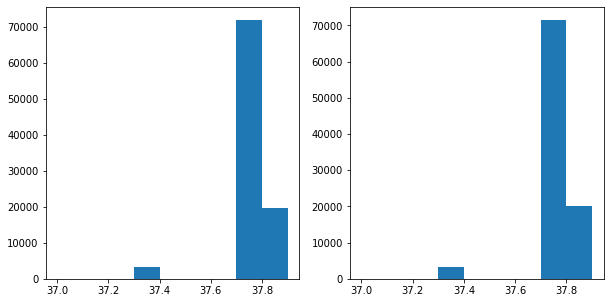

In [347]:
# Start and End station latitude

plt.figure(figsize = [10, 5]) # larger figure size for subplots

# First plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(37, df.start_station_latitude.max()+0.1, 0.1)
plt.hist(data = df, x = 'start_station_latitude', bins = bin_edges);

# Second plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(37, df.end_station_latitude.max()+0.1, 0.1)
plt.hist(data = df, x = 'end_station_latitude', bins = bin_edges);

> That's not satisfying result but I think it comes like that because of each start depend with end station . . also because the bikes in one place so the distances not that long enough. Even though the distance in latitude measurement not in meters. ***The important thing to now is they are nearly in the same place***

In [348]:
# Store Bike Share values based on the user_type

No_bike_share = df[df.bike_share_for_all_trip == 'No'].groupby('user_type').bike_share_for_all_trip.count()
with_bike_share = df[df.bike_share_for_all_trip == 'Yes'].groupby('user_type').bike_share_for_all_trip.count()

In [349]:
print('Subscribers with bike share for all_trip' , with_bike_share.Subscriber )
print('Subscribers not with bike share for all_trip' , No_bike_share.Subscriber )
print('Customers with bike share for all_trip' , with_bike_share.Customer )
print('Customers not with bike share for all_trip' , No_bike_share.Customer )

Subscribers with bike share for all_trip 6122
Subscribers not with bike share for all_trip 76336
Customers with bike share for all_trip 0
Customers not with bike share for all_trip 12344


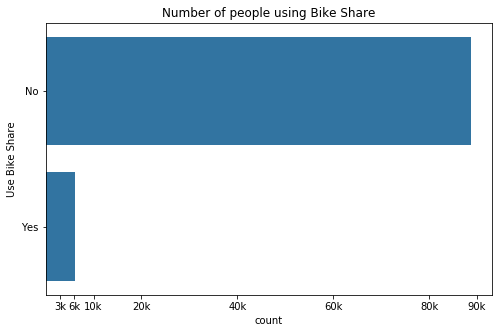

In [350]:
# Based on Bike Share variable plot bar chart


# resize the plot
plt.figure(figsize=[8, 5])

# take the base color to enhance the design
base_color = sb.color_palette()[0]

# Using seaborn plot bar chart
sb.countplot(data = df, y = 'bike_share_for_all_trip', color = base_color)

# Enhance the plot
plt.xticks([ 3000 , 6000 , 10000 , 20000 , 40000 , 60000, 80000 , 90000] , [ '3k' , '6k' , '10k' , '20k' , '40k' , '60k' , '80k' , '90k'])
plt.ylabel('Use Bike Share') 
plt.title('Number of people using Bike Share')

# Show the plot
plt.show()

> As it shows the users how don't use bike share ( which is subscribtion with lower price ) higher than the user who use it.

<a id='point'></a>

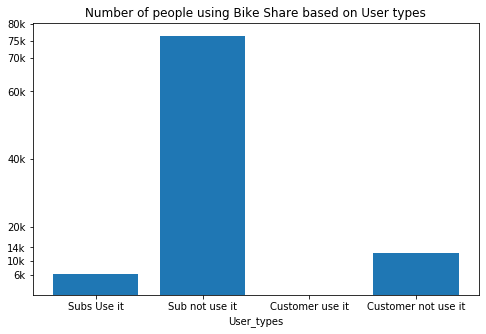

In [351]:
# Based on User type variable plot bar chart for Bike share variable    

# Store List for each user type with different values of bike share
users = [with_bike_share.Subscriber , No_bike_share.Subscriber , with_bike_share.Customer , No_bike_share.Customer ]

# resize the plot
plt.figure(figsize=[8, 5])

# Using matplotlib plot the list
plt.bar([1,2,3,4], users);

# Enhance the plot
plt.xticks( [1 , 2 , 3 , 4] , ['Subs Use it' , 'Sub not use it' , 'Customer use it' , 'Customer not use it'])
plt.yticks([ 6000 , 10000 , 14000 , 20000 , 40000 , 60000, 70000 , 75000 , 80000 ] , [ '6k' , '10k' , '14k' , '20k' , '40k' , '60k', '70k' , '75k', '80k' ])
plt.title('Number of people using Bike Share based on User types')
plt.xlabel('User_types')

# Show the plot
plt.show()

> based on the result only subscribers who use Bike Share which I guess it means only the subscribers could benefit from this offer of subscribition. All of the Customers not using Bike Share

***Useful [link](https://stackoverflow.com/questions/47462690/how-to-get-top-5-values-from-pandas-dataframe) for sorting data and get the higher and lower values from it . .***

In [352]:
# Top 5 most taken trips

top_5_trips = df.sort_values(by=['duration_sec']).tail(5)
top_5_trips

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
69713,84193,2018-01-10 10:01:32.352,2018-01-11 09:24:46.268,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,72,Page St at Scott St,37.772406,-122.435650,3653,Subscriber,No
19446,84609,2018-01-25 17:35:02.514,2018-01-26 17:05:12.371,49,S Park St at 3rd St,37.780760,-122.394989,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3642,Subscriber,No
60139,85079,2018-01-13 13:44:59.589,2018-01-14 13:22:59.272,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,31,Raymond Kimbell Playground,37.783813,-122.434559,2841,Customer,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2228,85546,2018-01-30 14:45:44.480,2018-01-31 14:31:31.053,6,The Embarcadero at Sansome St,37.804770,-122.403234,24,Spear St at Folsom St,37.789677,-122.390428,364,Customer,No


In [353]:
top_5_trips.duration_sec

69713    84193
19446    84609
60139    85079
1        85422
2228     85546
Name: duration_sec, dtype: int64

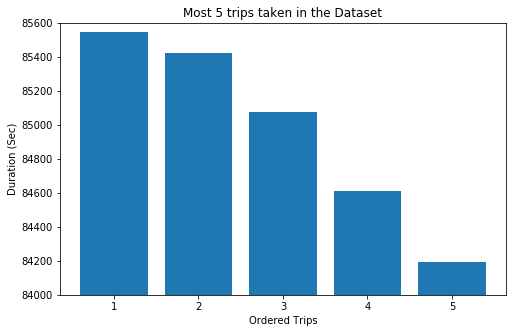

In [354]:
# resize the plot
plt.figure(figsize=[8, 5])

# Using matplotlib plot Bar chart
plt.bar([ 5, 4,3,2,1] , top_5_trips.duration_sec)

# Enhance the plot
plt.ylim([84000,85600])
plt.xlabel('Ordered Trips')
plt.ylabel('Duration (Sec)')
plt.title('Most 5 trips taken in the Dataset')

# Show the plot
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration is normation distributed betweet 300 and 1000. There is unusual duartion values when goes above the 10 or 12 thousand and it very low as the graph shows. There is transformation to log scale. Another thing is getting the top 5 most trips taken based on duration and that's one of the most priorities for this analysis.

***Most trips taken with durations equal to :***
#1 84193
#2 84609
#3 85079
#4 85422
#5 85546

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distance variable for the start and end station looks the same maybe it helpful for showing it's for one place . . another thing is for the user_type and bike_share_for_all_trip variables it shows that the Customers could not use Bike share also it shows that 6122 of subscribers only use the Bike share which I think it's low number . investigating in these features is must for me to understand the data and the flow for user types and distances for their trips.

## Bivariate Exploration

These links was really helpful . .  I didn't know I could deal with Timestamp in this way , [Extract time and date from timestamp](https://stackoverflow.com/questions/54733465/pandas-how-to-extract-hhmm-from-datetime-column-in-python/54733547) , also [Take the time delta rightaway](https://stackoverflow.com/questions/22923775/calculate-pandas-dataframe-time-difference-between-two-columns-in-hours-and-minu) what a powerful of pandas dataframe that's why I like Python and it's libraries.

In [355]:
timeDifference = df.end_time - df.start_time
distanceDifference = df.end_station_latitude - df.start_station_latitude
df['time'] = timeDifference
df['distance'] = distanceDifference

In [356]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,time,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,20:54:44.585000,0.022100
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,23:43:42.959000,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,19:52:56.227000,-0.022760
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,16:57:56.938000,0.007161
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,11:06:06.386000,0.012540


> Not correct output . .

In [357]:
timeDifference = df.start_time - df.end_time
df['time'] = timeDifference
timeDifference

0       -1 days +03:05:15.415000
1       -1 days +00:16:17.041000
2       -1 days +04:07:03.773000
3       -1 days +07:02:03.062000
4       -1 days +12:53:53.614000
                  ...           
94797   -1 days +23:48:24.929000
94798   -1 days +23:49:59.687000
94799   -1 days +23:40:48.586000
94800   -1 days +23:48:05.868000
94801   -1 days +23:57:34.799000
Length: 94802, dtype: timedelta64[ns]

> I'm just going to keep it like this even though that not all time values correct for now . .

In [358]:
print( df.end_time.dt.strftime('%Y/%m/%d')  )

0        2018/02/01
1        2018/02/01
2        2018/02/01
3        2018/02/01
4        2018/02/01
            ...    
94797    2018/01/01
94798    2018/01/01
94799    2018/01/01
94800    2018/01/01
94801    2018/01/01
Name: end_time, Length: 94802, dtype: object


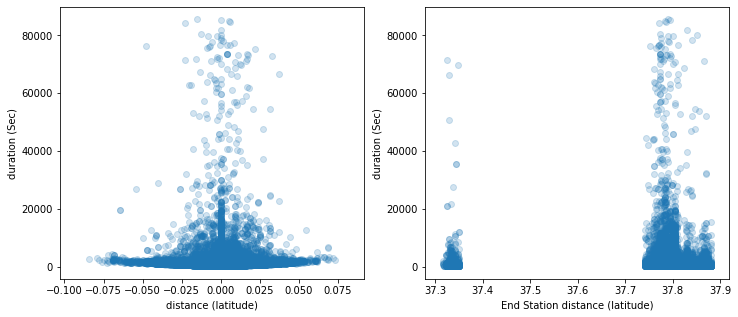

In [359]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.scatter(data = df , x = 'distance' , y = 'duration_sec' ,  alpha = 1/5 );
plt.xlabel('distance (latitude)')
plt.ylabel('duration (Sec)')


plt.subplot(1, 2, 2)
plt.scatter(data = df , x = 'end_station_latitude' , y = 'duration_sec' , alpha = 1/5 );
plt.xlabel('End Station distance (latitude)')
plt.ylabel('duration (Sec)')

plt.show()

>As it shows for the trips for the first graph the most trip taken are above the 80 thousand duration which I want them because they define one of my goals of this analysis which is getting the most trips taken in the GoBike ford system. <br><br> most of trips duration are between 300 to 1 thousand as previous result from the univariate visualization ***but as it shows maybe reach to 10 thousand approximately as nearly number for the most trips duration based on distance.***

In [360]:
df.duration_sec.describe() , df.distance.describe()

(count    94802.000000
 mean       870.935930
 std       2550.596891
 min         61.000000
 25%        359.000000
 50%        555.000000
 75%        854.000000
 max      85546.000000
 Name: duration_sec, dtype: float64,
 count    94802.000000
 mean         0.000215
 std          0.013528
 min         -0.084410
 25%         -0.008213
 50%          0.000000
 75%          0.008552
 max          0.072883
 Name: distance, dtype: float64)

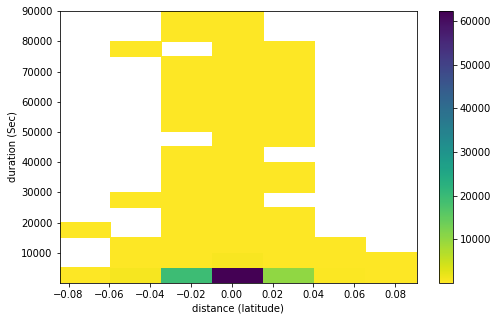

In [361]:
binsize_y = np.arange (61 , 85546 + 5000 , 5000 )
binsize_x = np.arange ( -0.084410 ,  0.072883 + 0.025 , 0.025 )

# resize the plot
plt.figure(figsize = [8, 5])

# Using matplotlib plot heatmap
plt.hist2d(data = df , x = 'distance' , y = 'duration_sec' , cmin= 0.5 , cmap = 'viridis_r' , bins = [binsize_x , binsize_y] );

# Enhance the plot
plt.colorbar()
plt.xlabel('distance (latitude)')
plt.ylabel('duration (Sec)')

# Show the plot
plt.show()

> Reflecting the previous scatter plot into heatmap which gives more clarity . . that's really great I like it.

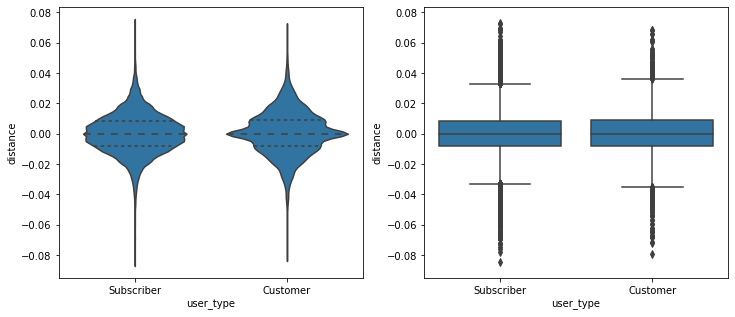

In [362]:
# Resize the plot
plt.figure(figsize = [12, 5])

# First plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'user_type', y = 'distance', color = base_color ,  inner = 'quartile');

# Second plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'user_type', y = 'distance', color = base_color);
plt.ylim(ax1.get_ylim()) 

# Show the plot
plt.show()

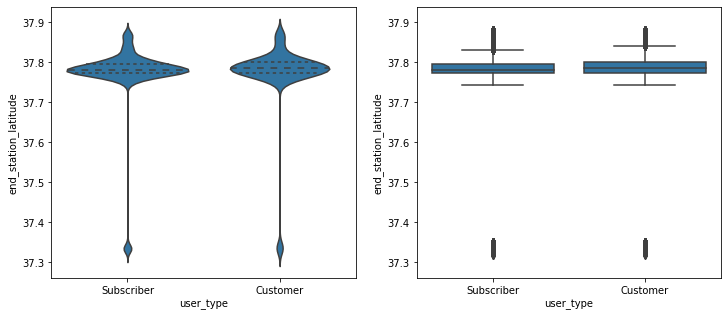

In [363]:
plt.figure(figsize = [12, 5])
y = np.arange (61 , 85546 + 5000 , 5000 )

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'user_type', y = 'end_station_latitude', color = base_color , inner = 'quartile' );

plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'user_type', y = 'end_station_latitude', color = base_color);
plt.ylim(ax1.get_ylim()) 

plt.show()

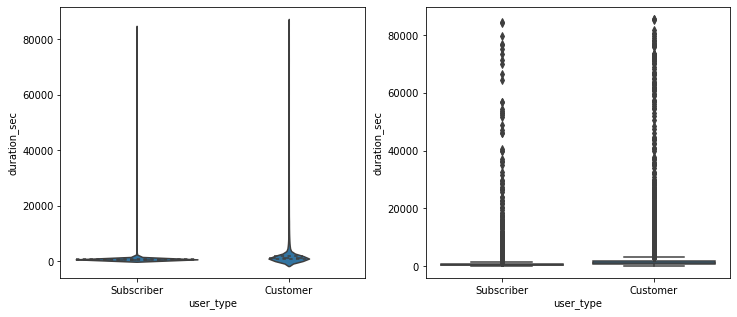

In [364]:
plt.figure(figsize = [12, 5])

# I tried everything to add the pins but it wouldn't work I don't know what's the wrong
y = np.arange (61 , 85546 + 5000 , 5000 )


plt.subplot(1,2, 1)
sb.violinplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color, inner = 'quartile');


plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color );



plt.show()

> beacause the data of duration is too big I couldn't get well and I tried to use bins but it didn't work . . So I'm going to take the box plot with limiting the data

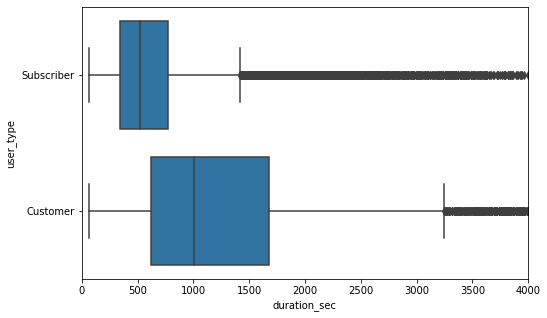

In [365]:
plt.figure(figsize = [8, 5])

sb.boxplot(data = df, y = 'user_type', x = 'duration_sec', color = base_color );
plt.xlim([0 , 4000]) 

plt.show()

> Using Violin and Box plot implement different features like distance , duration , end station . . <br> get these proberties Min and Max value seeing the outliers and the mean

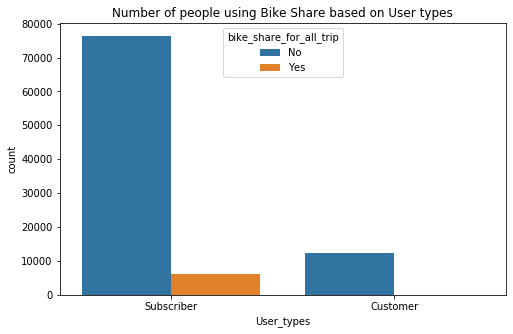

In [366]:
# resize the plot
plt.figure(figsize=[8, 5])

# Using seaborn plot clustred bar chart
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip');

# Enhance the plot
plt.title('Number of people using Bike Share based on User types')
plt.xlabel('User_types')

# Show the plot
plt.show()

> What a powerful of clustred bar chart that enhance version of univariate plot to bivariate plot . . the code is better code and much easier comparing to the univariate bar chart you could see the code <a href='#point'>Here</a>

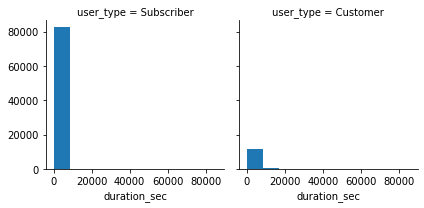

In [367]:
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "duration_sec")
plt.show()

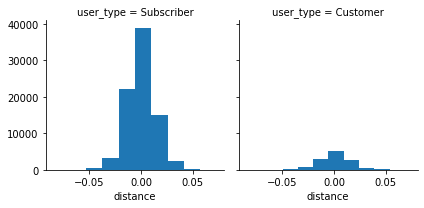

In [368]:
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "distance")
plt.show()

> Using faceting exploring features . . 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As it shows in the data the duration is mostly between 300 to 10 thousand based on distance and 300 to 10 thousand normally without depending in certain factor .. based on user types I found that the Customers have higher duration value. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

As it shows in the data the I compared the user_types with different features like distance , end_station latitude and bike share for all trip .. and I found outliers and Min and Max values for these features based on user type. and I found the Customer have higher distance even when they less than the Subscribers as quantity. 

## Multivariate Exploration

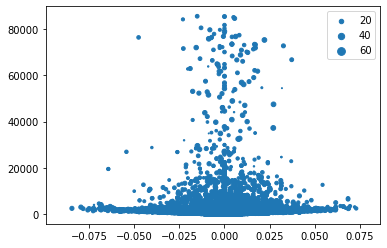

In [369]:
plt.scatter(data = df, x = 'distance', y = 'duration_sec', s = df.start_time.dt.strftime('%H').astype(int))

# dummy series for adding legend
sizes = [20, 40, 60]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

plt.show()

> Not so clear on the data in the below because the data are conflicting together

/Library/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


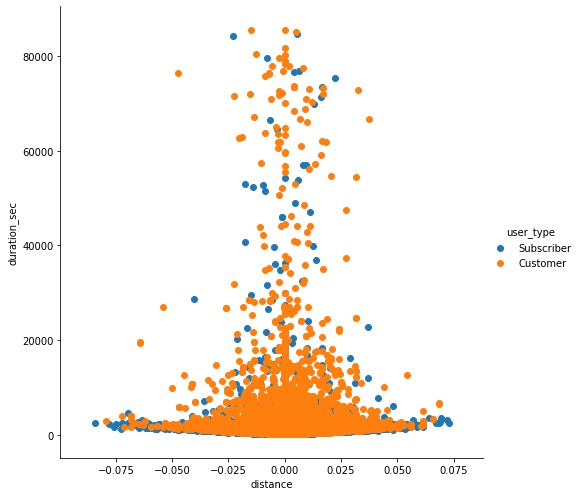

In [370]:
binsize_y = np.arange (61 , 85546 + 5000 , 5000 )
binsize_x = np.arange ( -0.084410 ,  0.072883 + 0.025 , 0.025 )

g = sb.FacetGrid(data = df, hue = 'user_type', size = 7 )
g.map(plt.scatter, 'distance', 'duration_sec' )
g.add_legend()

plt.show()

> Non-Positional Encodings for Third Variables

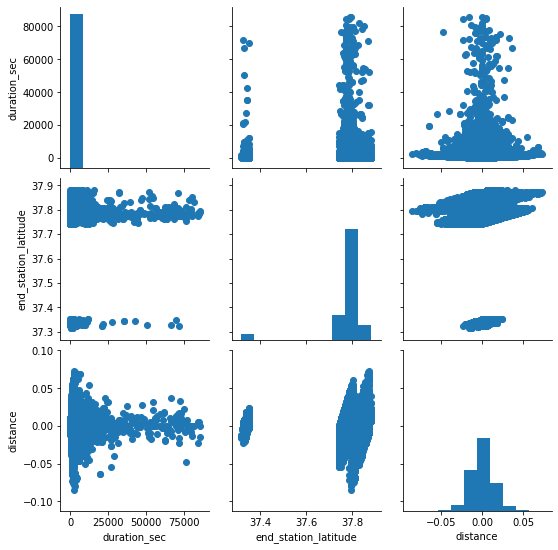

In [371]:
numeric_vars = ['duration_sec',  'end_station_latitude', 'distance']
g = sb.PairGrid(data = df, vars = numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

> Using Plot matrices exploring the data

In [372]:
numeric_vars = ['duration_sec', 'start_station_latitude', 'end_station_latitude', 'distance']

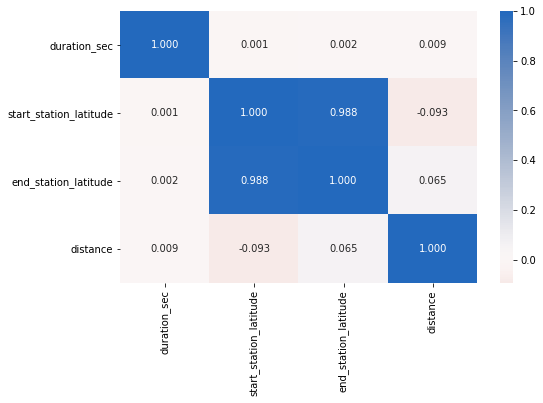

In [373]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> That's a Code I use it from the Sample Project that Udacity provided . . Just to see if there is anything useful to inteprete based on it , but I don't think I get something useful from it.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the second graph it comes more clear for me with the non positional encodings that the Customers have higher value of distance and duration even when they less number of users than the Subscribers.

### Were there any interesting or surprising interactions between features?

Still with the outliers of the distance couldn't found more than that in multivariate. .

In [374]:
df.to_csv('GoBike.csv')